## Importer les bibliothèques

In [136]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score


## Charger les donnes

In [60]:
data = pd.read_csv('ds_salaries.csv')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### description statistique

In [7]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


### Obtenir des informations sur les variables

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Obtenir les dimensions du dataframe

In [10]:
data.shape

(607, 12)

### data types

In [12]:
data.dtypes

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Compter le nombre de valeurs manquantes

In [13]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Afficher les premières lignes 

In [14]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Créer un histogramme d'une variable 

<function matplotlib.pyplot.show(close=None, block=None)>

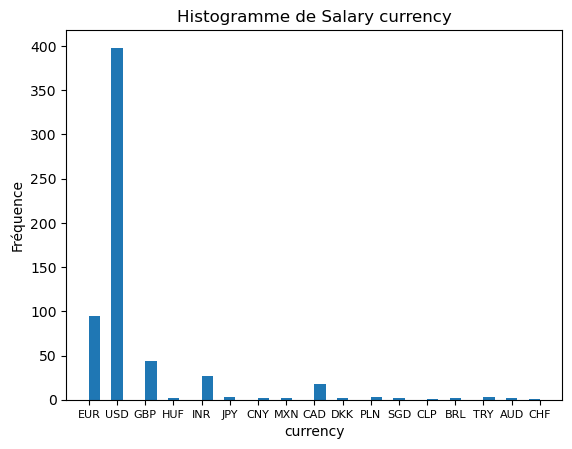

In [47]:
plt.hist(data['salary_currency'], bins=40)

# Ajouter un titre et des étiquettes d'axes
plt.title('Histogramme de Salary currency')
plt.xlabel('currency')
plt.ylabel('Fréquence')
plt.xticks(fontsize=8)
plt.show


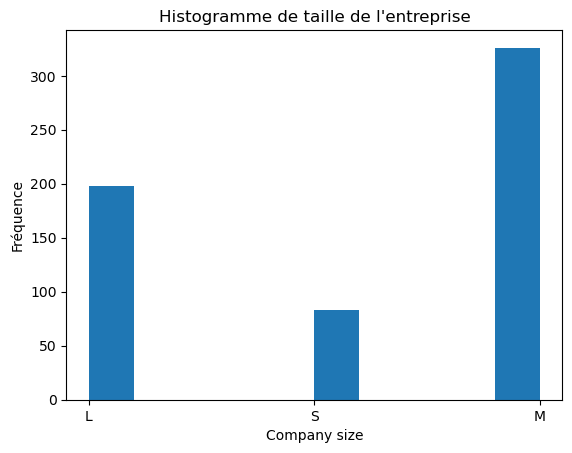

In [46]:
plt.hist(data['company_size'], bins=10)

# Ajouter un titre et des étiquettes d'axes
plt.title('Histogramme de taille de l\'entreprise')
plt.xlabel('Company size')
plt.ylabel('Fréquence')
plt.show()

### groupby compte le nombre d'occurrences de chaque valeur unique dans la colonne

#### 1- experience_level

In [49]:
nbClasse_experience_level = data.groupby('experience_level').size()
print(nbClasse_experience_level)

experience_level
EN     88
EX     26
MI    213
SE    280
dtype: int64


#### 2-employment_type

In [50]:
nbClasse_employment_type = data.groupby('employment_type').size()
print(nbClasse_employment_type)

employment_type
CT      5
FL      4
FT    588
PT     10
dtype: int64


#### 3-job_title

In [52]:
nbClasse_job_title = data.groupby('job_title').size()
print(nbClasse_job_title)

job_title
3D Computer Vision Researcher                 1
AI Scientist                                  7
Analytics Engineer                            4
Applied Data Scientist                        5
Applied Machine Learning Scientist            4
BI Data Analyst                               6
Big Data Architect                            1
Big Data Engineer                             8
Business Data Analyst                         5
Cloud Data Engineer                           2
Computer Vision Engineer                      6
Computer Vision Software Engineer             3
Data Analyst                                 97
Data Analytics Engineer                       4
Data Analytics Lead                           1
Data Analytics Manager                        7
Data Architect                               11
Data Engineer                               132
Data Engineering Manager                      5
Data Science Consultant                       7
Data Science Engineer         

#### 4-salary_currency

In [53]:
nbClasse_salary_currency = data.groupby('salary_currency').size()
print(nbClasse_salary_currency)

salary_currency
AUD      2
BRL      2
CAD     18
CHF      1
CLP      1
CNY      2
DKK      2
EUR     95
GBP     44
HUF      2
INR     27
JPY      3
MXN      2
PLN      3
SGD      2
TRY      3
USD    398
dtype: int64


#### 5-employee_residence

In [54]:
nbClasse_employee_residence = data.groupby('employee_residence').size()
print(nbClasse_employee_residence)

employee_residence
AE      3
AR      1
AT      3
AU      3
BE      2
BG      1
BO      1
BR      6
CA     29
CH      1
CL      1
CN      1
CO      1
CZ      1
DE     25
DK      2
DZ      1
EE      1
ES     15
FR     18
GB     44
GR     13
HK      1
HN      1
HR      1
HU      2
IE      1
IN     30
IQ      1
IR      1
IT      4
JE      1
JP      7
KE      1
LU      1
MD      1
MT      1
MX      2
MY      1
NG      2
NL      5
NZ      1
PH      1
PK      6
PL      4
PR      1
PT      6
RO      2
RS      1
RU      4
SG      2
SI      2
TN      1
TR      3
UA      1
US    332
VN      3
dtype: int64


#### 6- company_location

In [55]:
nbClasse_company_location = data.groupby('company_location').size()
print(nbClasse_company_location)

company_location
AE      3
AS      1
AT      4
AU      3
BE      2
BR      3
CA     30
CH      2
CL      1
CN      2
CO      1
CZ      2
DE     28
DK      3
DZ      1
EE      1
ES     14
FR     15
GB     47
GR     11
HN      1
HR      1
HU      1
IE      1
IL      1
IN     24
IQ      1
IR      1
IT      2
JP      6
KE      1
LU      3
MD      1
MT      1
MX      3
MY      1
NG      2
NL      4
NZ      1
PK      3
PL      4
PT      4
RO      1
RU      2
SG      1
SI      2
TR      3
UA      1
US    355
VN      1
dtype: int64


#### 7-company_size

In [56]:
nbClasse_company_size = data.groupby('company_size').size()
print(nbClasse_company_size)

company_size
L    198
M    326
S     83
dtype: int64


## Change String to Int

In [61]:
data['experience_level']=data['experience_level'].map({'EN':0, 
                                               'EX':1, 
                                               'MI':2, 
                                               'SE':3})
#
data['employment_type']=data['employment_type'].map({'CT':0, 
                                               'FL':1, 
                                               'FT':2, 
                                               'PT':3})
# 


#
data['job_title']=data['job_title'].map({'3D Computer Vision Researcher':0, 
                                               'AI Scientist':1, 
                                               'Analytics Engineer ':2,
                                               'Applied Data Scientist':3,
                                               'Applied Machine Learning Scientist':4,
                                               'Data Scientist':5,
                                               'BI Data Analyst':6,
                                               'Big Data Architect ':7, 
                                               'Big Data Engineer':8, 
                                               'Business Data Analyst':9,
                                               'Cloud Data Engineer ':10,
                                               'Computer Vision Engineer':11,
                                               'Computer Vision Software Engineer':12,
                                               'Data Analyst':13,
                                               'Data Analytics Engineer':14, 
                                               'Data Analytics Lead ':15, 
                                               'Data Analytics Manager':16,
                                               'Data Architect':17,
                                               'Data Engineer':18,
                                               'Data Engineering Manager':19,
                                               'Data Science Consultant':20,
                                               'Data Science Engineer':21,
                                               'Data Science Manager':22,
                                               'Data Scientist':23, 
                                               'Data Specialist':24, 
                                               'Director of Data Engineering':25,
                                               'Director of Data Science':26,
                                               'ETL Developer':27,
                                               'Finance Data Analyst':28,
                                               'Financial Data Analyst':29,
                                               'Head of Data':30, 
                                               'Head of Data Science':31, 
                                               'Head of Machine Learning':32,
                                               'Lead Data Analyst':33,
                                               'Lead Data Engineer':34,
                                               'Lead Data Scientist':35,
                                               'Lead Machine Learning Engineer':36,
                                               'ML Engineer':37, 
                                               'Machine Learning Developer':38, 
                                               'Machine Learning Engineer':39,
                                               'Machine Learning Infrastructure Engineer':40,
                                               'Machine Learning Manager':41,
                                               'Machine Learning Scientist':42,
                                               'Marketing Data Analyst':43,
                                               'NLP Engineer':44,
                                               'Principal Data Analyst':45,
                                               'Principal Data Engineer':46,
                                               'Principal Data Scientist':47,
                                               'Product Data Analyst':48,
                                               'Research Scientist':49,
                                               'Staff Data Scientist':50})


#
#
data['salary_currency']=data['salary_currency'].map({'AUD':0, 
                                               'BRL':1, 
                                                'CAD':2,
                                                'CHF':3, 
                                                'CLP':4,
                                                'CNY':5, 
                                                'DKK':6,
                                                'EUR':7,
                                                'GBP':8,
                                                'HUF':9,
                                                'INR':10,
                                                'JPY':11,
                                                'MXN':12,
                                                'PLN':13,
                                                'SGD':14,
                                                'TRY':15,
                                                'USD':16})

#emplyee residence




data['employee_residence']=data['employee_residence'].map({'AE':0,
                                                    'AR':1,
                                                    'AT':2,
                                                    'AU':3,
                                                    'BE':4,
                                                    'BG':5,
                                                    'BO':6,
                                                    'BR':7,
                                                    'CA':8,
                                                    'CH':9,
                                                    'CL':10,
                                                    'CN':11,
                                                    'CO':12,
                                                    'CZ':13,
                                                    'DE':14,
                                                    'DK':15,
                                                    'DZ':16,
                                                    'EE':17,
                                                    'ES':18,
                                                    'FR':19,
                                                    'GB':20,
                                                    'GR':21,
                                                    'HK':22,
                                                    'HN':23,
                                                    'HR':24,
                                                    'HU':25,
                                                    'IE':26,
                                                    'IN':27,
                                                    'IQ':28,
                                                    'IR':29,
                                                    'IT':30,
                                                    'JE':31,
                                                    'JP':32,
                                                    'KE':33,
                                                    'LU':34,
                                                    'MD':35,
                                                    'MT':36,
                                                    'MX':37,
                                                    'MY':38,
                                                    'NG':39,
                                                    'NL':40,
                                                    'NZ':41,
                                                    'PH':42,
                                                    'PK':42,
                                                    'PL':43,
                                                    'PR':44,
                                                    'PT':45,
                                                    'RO':46,
                                                    'RS':47,
                                                    'RU':48,
                                                    'SG':49,
                                                    'SI':50,
                                                    'TN':51,
                                                    'TR':52,
                                                    'US':53,
                                                    'US':54,
                                                    'VN':55,
                                                          })

#company location 

data['company_location']=data['company_location'].map({'AE':0,
                                                    'AS':1,
                                                    'AT':2,
                                                    'AU':3,
                                                    'BE':4,
                                                    'BR':5,
                                                    'CA':6,
                                                    'CH':7,
                                                    'CL':8,
                                                    'CN':9,
                                                    'CO':10,
                                                    'CZ':11,
                                                    'DE':12,
                                                    'DK':13,
                                                    'DZ':14,
                                                    'EE':15,
                                                    'ES':16,
                                                    'FR':17,
                                                    'GB':18,
                                                    'GR':19,
                                                    'HN':20,
                                                    'HR':21,
                                                    'HU':22,
                                                    'IE':23,
                                                    'IL':24,
                                                    'IN':25,
                                                    'IQ':26,
                                                    'IR':27,
                                                    'IT':28,
                                                    'JP':29,
                                                    'KE':30,
                                                    'LU':31,
                                                    'MD':32,
                                                    'MT':33,
                                                    'MX':34,
                                                    'MY':35,
                                                    'NG':36,
                                                    'NL':37,
                                                    'NZ':38,
                                                    'PK':39,
                                                    'PL':40,
                                                    'PT':41,
                                                    'RO':42,
                                                    'RU':42,
                                                    'SG':43,
                                                    'SI':44,
                                                    'TR':45,
                                                    'UA':46,
                                                    'US':47,
                                                    'VN':48})

#size 

data['company_size']=data['company_size'].map({'L':0, 
                                               'M':1,  
                                               'S':2})

In [62]:
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,23.0,70000,7,79833,14.0,0,12,0
1,1,2020,3,2,42.0,260000,16,260000,32.0,0,29,2
2,2,2020,3,2,8.0,85000,8,109024,20.0,50,18,1
3,3,2020,2,2,48.0,20000,16,20000,23.0,0,20,2
4,4,2020,3,2,39.0,150000,16,150000,54.0,50,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,3,2,18.0,154000,16,154000,54.0,100,47,1
603,603,2022,3,2,18.0,126000,16,126000,54.0,100,47,1
604,604,2022,3,2,13.0,129000,16,129000,54.0,0,47,1
605,605,2022,3,2,13.0,150000,16,150000,54.0,100,47,1


# Réduction de la dimension ACP

In [65]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             8
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    1
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [66]:
data.shape

(607, 12)

### supprimer les valeur null

In [67]:
data=data.dropna()

In [68]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [69]:
data.shape

(598, 12)

## Step 1: Standardize the data

In [91]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std

array([[-1.72663552, -2.02213296, -0.12475023, ..., -1.74543256,
        -1.48779808, -1.24042543],
       [-1.7209282 , -2.02213296,  0.8440892 , ..., -1.74543256,
        -0.39700367,  1.81843811],
       [-1.71522088, -2.02213296,  0.8440892 , ..., -0.51602305,
        -1.10281182,  0.28900634],
       ...,
       [ 1.72058461,  0.86043083,  0.8440892 , ..., -1.74543256,
         0.75795511,  0.28900634],
       [ 1.72629193,  0.86043083,  0.8440892 , ...,  0.71338645,
         0.75795511,  0.28900634],
       [ 1.73199925,  0.86043083, -0.12475023, ...,  0.71338645,
         0.75795511, -1.24042543]])

## Step 2: Calculate the covariance matrix

In [92]:
cov_matrix = np.cov(data_std.T)

cov_matrix

array([[ 1.00167504e+00,  8.88492097e-01,  2.88266084e-01,
         1.36852886e-03, -1.35806358e-01, -9.74958367e-02,
         1.90518406e-01,  1.54961958e-01,  1.77836020e-01,
         1.03791428e-01,  1.58587433e-01,  9.10604054e-02],
       [ 8.88492097e-01,  1.00167504e+00,  3.03993013e-01,
         1.63279827e-02, -1.57142602e-01, -8.81744499e-02,
         1.99437602e-01,  1.62497948e-01,  1.86934467e-01,
         7.96757554e-02,  1.76261926e-01,  7.95340513e-02],
       [ 2.88266084e-01,  3.03993013e-01,  1.00167504e+00,
        -4.41536059e-02,  2.54917368e-02, -2.46817769e-02,
         2.08270013e-01,  3.12155026e-01,  2.37022709e-01,
         6.32073331e-02,  2.52885320e-01, -7.30954620e-02],
       [ 1.36852886e-03,  1.63279827e-02, -4.41536059e-02,
         1.00167504e+00, -1.03250842e-01,  5.79009299e-04,
        -8.83304808e-02, -1.26504847e-01, -1.10703071e-01,
        -4.59730492e-02, -8.39846590e-02,  3.48689127e-02],
       [-1.35806358e-01, -1.57142602e-01,  2.5491736

##  Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix


In [93]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
cov_matrix

array([[ 1.00167504e+00,  8.88492097e-01,  2.88266084e-01,
         1.36852886e-03, -1.35806358e-01, -9.74958367e-02,
         1.90518406e-01,  1.54961958e-01,  1.77836020e-01,
         1.03791428e-01,  1.58587433e-01,  9.10604054e-02],
       [ 8.88492097e-01,  1.00167504e+00,  3.03993013e-01,
         1.63279827e-02, -1.57142602e-01, -8.81744499e-02,
         1.99437602e-01,  1.62497948e-01,  1.86934467e-01,
         7.96757554e-02,  1.76261926e-01,  7.95340513e-02],
       [ 2.88266084e-01,  3.03993013e-01,  1.00167504e+00,
        -4.41536059e-02,  2.54917368e-02, -2.46817769e-02,
         2.08270013e-01,  3.12155026e-01,  2.37022709e-01,
         6.32073331e-02,  2.52885320e-01, -7.30954620e-02],
       [ 1.36852886e-03,  1.63279827e-02, -4.41536059e-02,
         1.00167504e+00, -1.03250842e-01,  5.79009299e-04,
        -8.83304808e-02, -1.26504847e-01, -1.10703071e-01,
        -4.59730492e-02, -8.39846590e-02,  3.48689127e-02],
       [-1.35806358e-01, -1.57142602e-01,  2.5491736

##  Step 4: Choose the number of principal components

In [94]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

## Step 5: Transform the data

In [95]:
data_pca = pca.fit_transform(data_std)
data_pca

array([[ 3.39760046,  1.43861668],
       [ 0.64593082,  2.29448348],
       [ 2.31033342,  1.05090162],
       ...,
       [-1.85624263, -1.32968285],
       [-2.30707969, -1.27723358],
       [-1.72747144, -1.26343799]])

## Step 6: Analyze the results

In [96]:
print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.28310995 0.14948797]


# Visualiser les projections des données sur les premiers axes principaux 

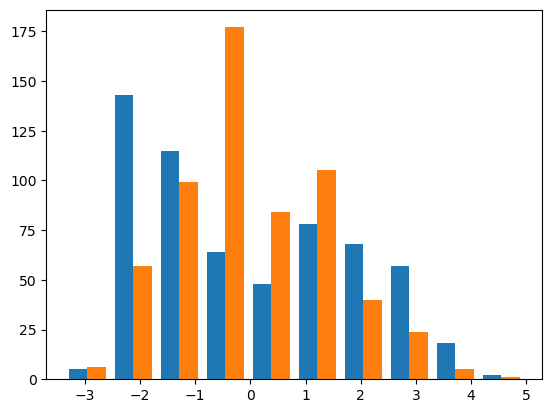

In [99]:
plt.hist(data_pca, bins=10)
plt.show()

###  tracer un graphique en nuage de points avec les projections des données sur les deux premiers axes principaux

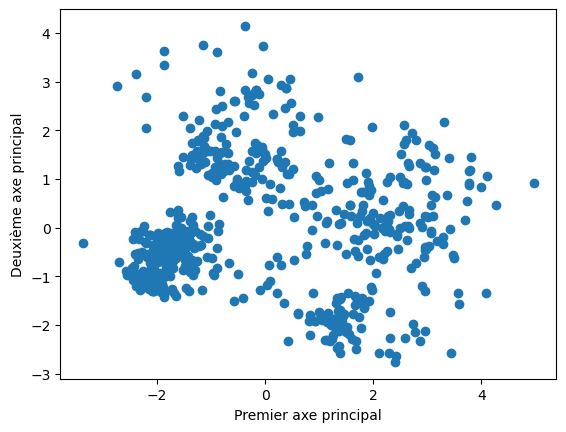

In [98]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Premier axe principal')
plt.ylabel('Deuxième axe principal')
plt.show()

# K means

In [114]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_pca)
y_predicted=kmeans.fit_predict(data_pca)
y_predicted

array([2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,

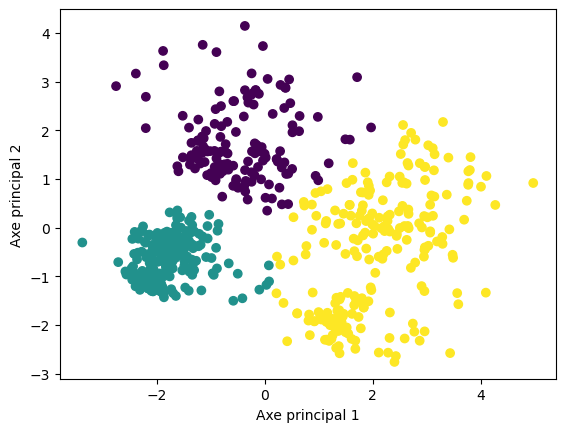

In [115]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.show()

# DBSCAN

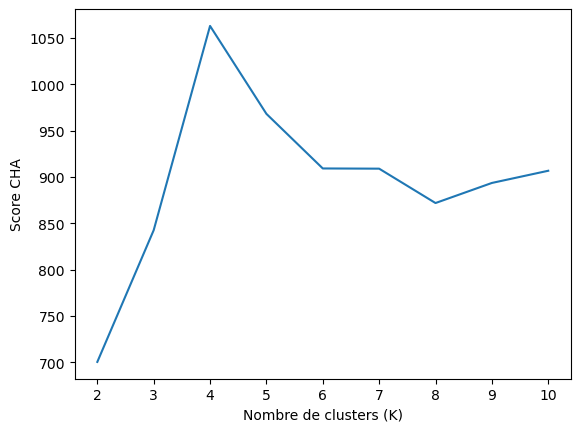

In [117]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    scores.append(calinski_harabasz_score(data_pca, kmeans.labels_))
plt.plot(range(2, 11), scores)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score CHA')
plt.show()

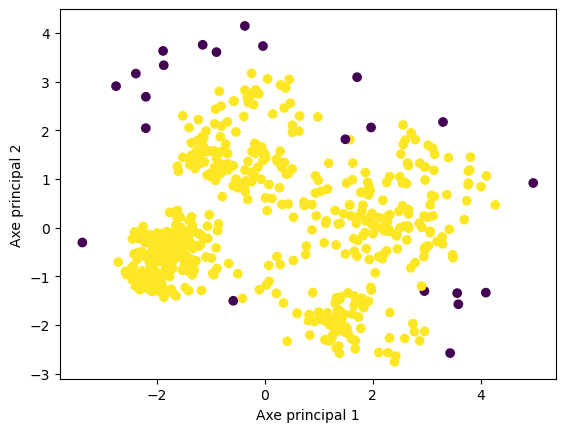

In [124]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_pca)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan.labels_)
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.show()